<a href="https://colab.research.google.com/github/Freya-LR/strategic_network/blob/master/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, FigureCanvasPdf
from matplotlib.figure import Figure
import keras
from keras.models import Model ,Sequential 
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from sklearn.model_selection import train_test_split

import warnings
import matplotlib.cbook
from IPython.display import SVG
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
from google.colab import drive
drive.mount('/content/drive')


Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:

with pd.ExcelFile('/content/drive/My Drive/output_values/output_n10_3.xlsx') as reader:
    
    closeness_n10_3=pd.read_excel(reader,sheet_name="closeness_centrality")
    betweenness_n10_3=pd.read_excel(reader,sheet_name="betweenness_centrality")
    eigenvector_n10_3=pd.read_excel(reader,sheet_name="eigenvector_centrality")
    page_rank_n10_3=pd.read_excel(reader,sheet_name="page_rank")
    triangles_n10_3=pd.read_excel(reader,sheet_name="triangles")
    clustering_n10_3=pd.read_excel(reader,sheet_name="clustering")
    wiener_index_n10_3=pd.read_excel(reader,sheet_name="wiener_index")
    transitivity_n10_3=pd.read_excel(reader,sheet_name="transitivity")
    diameter_radius_center_periphery_density_n10_3=pd.read_excel(reader,sheet_name="d_r_c_p_d")
    Efficiency_loss_n10_3=pd.read_excel(reader,sheet_name="Efficiency_loss")




In [ ]:

def com_data(n,closeness, betweenness, eigenvector,page_rank,triangles,clustering,wiener_index,transitivity,
             diameter_radius_center_periphery_density,Efficiency_loss):
    la=np.zeros((n,3))
    for i in range(n):
        la[i]=[wiener_index[0][i],transitivity[0][i],diameter_radius_center_periphery_density[4][i]]

    Y = np.array(Efficiency_loss[0])
    l=np.zeros((n,10,6))
    for i in range(n):
        for j in range(10):
            l[i][j]=[closeness[j][i],betweenness[j][i],eigenvector[j][i],page_rank[j][i],triangles[j][i],clustering[j][i]]
    print(l.shape)
    print(Y.shape)
    print(la.shape)
    return l, la, Y


In [ ]:
def CNN(X,y):    #convolutional
    #create model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=42)
    num_out_layer=int(max(y_train)+1)
    X_train=np.expand_dims(X_train, axis=3)
    X_test=np.expand_dims(X_test, axis=3)
    num_filters = 8
    filter_size = 3
    pool_size = 2

    model = Sequential([
      Conv2D(num_filters, filter_size, input_shape=(10, 6, 1)),
      MaxPooling2D(pool_size=pool_size),
      Flatten(),
      Dense(num_out_layer, activation='relu'),
    ])
    model.compile(optimizer='adam', loss='mean_squared_error',)
    early_stopping_monitor = EarlyStopping(patience=3)
    model.fit(X_train, to_categorical(y_train),
              validation_data=(X_test, to_categorical(y_test,num_classes=num_out_layer)),
              epochs=30, callbacks=[early_stopping_monitor],)
    # Evaluate the model on the test data using `evaluate`
    print("Evaluate on test data")
    results = model.evaluate(X_test, to_categorical(y_test,num_classes=num_out_layer), verbose=0)
    print("test loss:", results)
    # Generate predictions (probabilities -- the output of the last layer)
    # on new data using `predict`

    print("Generate predictions for 3 samples")
    predictions = model.predict(X_test[:3])

    print(predictions)
    
    return model





In [ ]:
X, Xa, y=com_data(1000, closeness_n10_3, betweenness_n10_3, eigenvector_n10_3,page_rank_n10_3,triangles_n10_3,clustering_n10_3,

        wiener_index_n10_3,transitivity_n10_3,diameter_radius_center_periphery_density_n10_3,Efficiency_loss_n10_3)


model=CNN(X,y)


(1000, 10, 6)
(1000,)
(1000, 3)
Train on 870 samples, validate on 130 samples
Epoch 1/30
870/870 [==============================] - 0s 136us/step - loss: 4.2585 - val_loss: 1.1256
Epoch 2/30
870/870 [==============================] - 0s 64us/step - loss: 0.5038 - val_loss: 0.1498
Epoch 3/30
870/870 [==============================] - 0s 67us/step - loss: 0.0952 - val_loss: 0.0673
Epoch 4/30
870/870 [==============================] - 0s 64us/step - loss: 0.0655 - val_loss: 0.0612
Epoch 5/30
870/870 [==============================] - 0s 62us/step - loss: 0.0620 - val_loss: 0.0601
Epoch 6/30
870/870 [==============================] - 0s 67us/step - loss: 0.0608 - val_loss: 0.0597
Epoch 7/30
870/870 [==============================] - 0s 64us/step - loss: 0.0602 - val_loss: 0.0596
Epoch 8/30
870/870 [==============================] - 0s 75us/step - loss: 0.0598 - val_loss: 0.0594
Epoch 9/30
870/870 [==============================] - 0s 78us/step - loss: 0.0597 - val_loss: 0.0593
Epoch 10/30


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 8, 4, 8)           80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 2, 8)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 17)                1105      
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


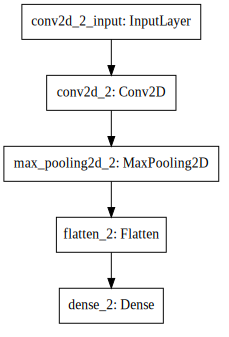

In [ ]:
# Summary of neural network
model.summary()

# Output network visualization
SVG(model_to_dot(model,show_layer_names=True, rankdir='TB',
    expand_nested=False, dpi=70).create(prog='dot', format='svg'))

In [ ]:
def CNN_s(X,y):   # 2d parameters without convolutional
    #create model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=42)
    num_out_layer=int(max(y_train)+1)
    model = Sequential([
      Dense(10, activation='relu',input_shape=(3, )),
      Dense(10,activation='relu'),
      Dense(num_out_layer),
    ])
    model.compile(optimizer='adam', loss='mean_squared_error',)
    early_stopping_monitor = EarlyStopping(patience=3)
    model.fit(X_train, to_categorical(y_train),
              validation_data=(X_test, to_categorical(y_test,num_classes=num_out_layer)),
              epochs=30, callbacks=[early_stopping_monitor],)
    # Evaluate the model on the test data using `evaluate`
    print("Evaluate on test data")
    results = model.evaluate(X_test, to_categorical(y_test,num_classes=num_out_layer), verbose=0)
    print("test loss:", results)
    # Generate predictions (probabilities -- the output of the last layer)
    # on new data using `predict`

    print("Generate predictions for 3 samples")
    predictions = model.predict(X_test[:3])

    print(predictions)
    
    return model



In [ ]:
model_s=CNN_s(Xa,y)
# Summary of neural network
model_s.summary()

# Output network visualization
SVG(model_to_dot(model_s,show_layer_names=True, rankdir='TB',
    expand_nested=False, dpi=70).create(prog='dot', format='svg'))

In [ ]:
def CNN_mc(X,y):   # change numbers of filter in convolutional
    #create model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=42)
    num_out_layer=int(max(y_train)+1)
    X_train=np.expand_dims(X_train, axis=3)
    X_test=np.expand_dims(X_test, axis=3)
    num_filters = 32
    filter_size = 4
    pool_size = 2

    model = Sequential([
      Conv2D(num_filters, filter_size, input_shape=(10, 6, 1)),
      MaxPooling2D(pool_size=pool_size),
      Flatten(),
      Dense(num_out_layer, activation='relu'),
    ])
    model.compile(optimizer='adam', loss='mean_squared_error',)
    early_stopping_monitor = EarlyStopping(patience=3)
    model.fit(X_train, to_categorical(y_train), 
              validation_data=(X_test, to_categorical(y_test,num_classes=num_out_layer)),
              epochs=30, callbacks=[early_stopping_monitor],)
    # Evaluate the model on the test data using `evaluate`
    print("Evaluate on test data")
    results = model.evaluate(X_test, to_categorical(y_test,num_classes=num_out_layer), verbose=0)
    print("test loss:", results)
    # Generate predictions (probabilities -- the output of the last layer)
    # on new data using `predict`

    print("Generate predictions for 3 samples")
    predictions = model.predict(X_test[:7])

    print(predictions)
    
    return model




In [ ]:
model_mc=CNN_mc(X,y)



Train on 870 samples, validate on 130 samples
Epoch 1/30
870/870 [==============================] - 0s 142us/step - loss: 0.8170 - val_loss: 0.0597
Epoch 2/30
870/870 [==============================] - 0s 84us/step - loss: 0.0591 - val_loss: 0.0582
Epoch 3/30
870/870 [==============================] - 0s 72us/step - loss: 0.0587 - val_loss: 0.0582
Epoch 4/30
870/870 [==============================] - 0s 68us/step - loss: 0.0586 - val_loss: 0.0583
Epoch 5/30
870/870 [==============================] - 0s 65us/step - loss: 0.0586 - val_loss: 0.0581
Epoch 6/30
870/870 [==============================] - 0s 75us/step - loss: 0.0586 - val_loss: 0.0583
Epoch 7/30
870/870 [==============================] - 0s 64us/step - loss: 0.0586 - val_loss: 0.0582
Epoch 8/30
870/870 [==============================] - 0s 62us/step - loss: 0.0586 - val_loss: 0.0585
Evaluate on test data
test loss: 0.05846380734672913
Generate predictions for 3 samples
[[0.         0.         0.         0.         0.         

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 7, 3, 32)          544       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 1, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 17)                1649      
Total params: 2,193
Trainable params: 2,193
Non-trainable params: 0
_________________________________________________________________


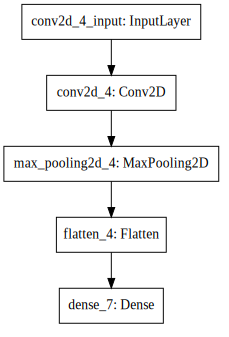

In [ ]:

# Summary of neural network
model_mc.summary()

# Output network visualization
SVG(model_to_dot(model_mc,show_layer_names=True, rankdir='TB',
    expand_nested=False, dpi=70).create(prog='dot', format='svg'))

In [ ]:
with pd.ExcelFile('/content/drive/My Drive/output_values/output_n10_3_combined.xlsx') as reader:
    
    closeness_n10_3_c=pd.read_excel(reader,sheet_name="closeness_centrality")
    betweenness_n10_3_c=pd.read_excel(reader,sheet_name="betweenness_centrality")
    eigenvector_n10_3_c=pd.read_excel(reader,sheet_name="eigenvector_centrality")
    page_rank_n10_3_c=pd.read_excel(reader,sheet_name="page_rank")
    triangles_n10_3_c=pd.read_excel(reader,sheet_name="triangles")
    clustering_n10_3_c=pd.read_excel(reader,sheet_name="clustering")
    wiener_index_n10_3_c=pd.read_excel(reader,sheet_name="wiener_index")
    transitivity_n10_3_c=pd.read_excel(reader,sheet_name="transitivity")
    eccentricity_n10_3_c=pd.read_excel(reader,sheet_name="eccentricity")

    diameter_radius_center_periphery_density_n10_3_c=pd.read_excel(reader,sheet_name="d_r_c_p_d")
    Efficiency_loss_n10_3_c=pd.read_excel(reader,sheet_name="Efficiency_loss")


In [ ]:
X_c, Xa_c, y_c=com_data(10560, closeness_n10_3_c, betweenness_n10_3_c, eigenvector_n10_3_c,
                        page_rank_n10_3_c,triangles_n10_3_c,clustering_n10_3_c,
                        wiener_index_n10_3_c,transitivity_n10_3_c,
                        diameter_radius_center_periphery_density_n10_3_c,
                        Efficiency_loss_n10_3_c)





(10560, 10, 6)
(10560,)
(10560, 3)


In [ ]:
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size=0.23, random_state=42)
model_c=CNN(X_c,y_c)

Train on 9187 samples, validate on 1373 samples
Epoch 1/30
9187/9187 [==============================] - 1s 75us/step - loss: 0.0923 - val_loss: 0.0069
Epoch 2/30
9187/9187 [==============================] - 1s 68us/step - loss: 0.0069 - val_loss: 0.0069
Epoch 3/30
9187/9187 [==============================] - 1s 69us/step - loss: 0.0069 - val_loss: 0.0069
Epoch 4/30
9187/9187 [==============================] - 1s 65us/step - loss: 0.0069 - val_loss: 0.0069
Epoch 5/30
9187/9187 [==============================] - 1s 63us/step - loss: 0.0069 - val_loss: 0.0069
Epoch 6/30
9187/9187 [==============================] - 1s 63us/step - loss: 0.0069 - val_loss: 0.0069
Epoch 7/30
9187/9187 [==============================] - 1s 65us/step - loss: 0.0069 - val_loss: 0.0069
Epoch 8/30
9187/9187 [==============================] - 1s 63us/step - loss: 0.0069 - val_loss: 0.0069
Epoch 9/30
9187/9187 [==============================] - 1s 65us/step - loss: 0.0069 - val_loss: 0.0069
Epoch 10/30
9187/9187 [==

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 7, 3, 32)          544       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 1, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 17)                1649      
Total params: 2,193
Trainable params: 2,193
Non-trainable params: 0
_________________________________________________________________


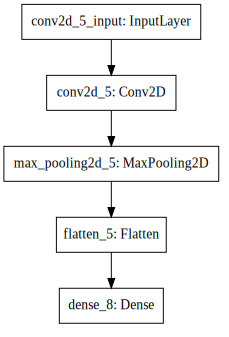

In [ ]:
# Summary of neural network
model_mc.summary()
# Output network visualization
SVG(model_to_dot(model_c,show_layer_names=True, rankdir='TB',
    expand_nested=False, dpi=70).create(prog='dot', format='svg'))

In [ ]:
model_s_c=CNN_s(Xa_c,y_c)

In [ ]:
# Summary of neural network
model_s_c.summary()

# Output network visualization
SVG(model_to_dot(model_s_c,show_layer_names=True, rankdir='TB',
    expand_nested=False, dpi=70).create(prog='dot', format='svg'))

In [ ]:
model_mc_c=CNN_mc(X_c,y_c)


Train on 9187 samples, validate on 1373 samples
Epoch 1/30
9187/9187 [==============================] - 1s 78us/step - loss: 0.0133 - val_loss: 0.0069
Epoch 2/30
9187/9187 [==============================] - 1s 68us/step - loss: 0.0068 - val_loss: 0.0069
Epoch 3/30
9187/9187 [==============================] - 1s 66us/step - loss: 0.0069 - val_loss: 0.0069
Epoch 4/30
9187/9187 [==============================] - 1s 69us/step - loss: 0.0068 - val_loss: 0.0069
Epoch 5/30
9187/9187 [==============================] - 1s 65us/step - loss: 0.0068 - val_loss: 0.0068
Epoch 6/30
9187/9187 [==============================] - 1s 66us/step - loss: 0.0068 - val_loss: 0.0068
Epoch 7/30
9187/9187 [==============================] - 1s 69us/step - loss: 0.0068 - val_loss: 0.0068
Epoch 8/30
9187/9187 [==============================] - 1s 67us/step - loss: 0.0068 - val_loss: 0.0068
Epoch 9/30
9187/9187 [==============================] - 1s 68us/step - loss: 0.0068 - val_loss: 0.0068
Evaluate on test data
tes

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 7, 3, 32)          544       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 1, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 146)               14162     
Total params: 14,706
Trainable params: 14,706
Non-trainable params: 0
_________________________________________________________________


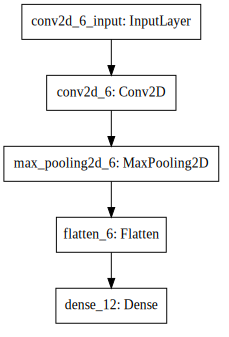

In [ ]:

# Summary of neural network
model_mc_c.summary()

# Output network visualization
SVG(model_to_dot(model_mc_c,show_layer_names=True, rankdir='TB',
    expand_nested=False, dpi=70).create(prog='dot', format='svg'))